Import Library And Lock PATH

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r"D:\ARSYAD\TelU\Semester5\KA\Tubes")
os.getcwd()

'D:\\ARSYAD\\TelU\\Semester5\\KA\\Tubes'

Read dataset

In [3]:
train = pd.read_csv("dataset/train.csv", sep=';')
test  = pd.read_csv("dataset/test.csv", sep=';')

In [4]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,52,technician,married,high.school,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
1,2,33,admin.,single,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
2,5,54,admin.,single,university.degree,no,yes,no,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,no
3,6,53,housemaid,married,high.school,no,no,yes,cellular,jun,...,1,999,2,failure,-2.9,92.963,-40.8,1.260,5076.2,yes
4,8,42,self-employed,married,university.degree,unknown,yes,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [5]:
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,21,student,single,unknown,no,no,no,telephone,jul,thu,1,12,1,success,-1.7,94.215,-40.3,0.810,4991.6
1,4,42,blue-collar,married,basic.6y,no,no,no,cellular,may,wed,3,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
2,7,42,technician,married,professional.course,no,yes,no,cellular,aug,wed,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2
3,9,33,services,married,professional.course,unknown,yes,no,cellular,may,wed,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
4,13,29,unemployed,divorced,high.school,no,no,no,cellular,oct,mon,1,999,0,nonexistent,-3.4,92.431,-26.9,0.743,5017.5


Mapping target String to numerik

In [6]:
train["y"] = train["y"].map({"yes":1, "no":0})

X = train.drop(columns=["y"])
y = train["y"]

In [7]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

In [8]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_encoded, y)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Sorting most feature with XGboost Model

In [9]:

import pandas as pd
import numpy as np

importance = model.feature_importances_

feat_imp = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

feat_imp.head(10)

,feature,importance
19,nr.employed,0.568669
15,emp.var.rate,0.075600
12,pdays,0.046120
14,poutcome,0.044358
17,cons.conf.idx,0.034388
18,euribor3m,0.027416
8,contact,0.026799
9,month,0.022450
5,default,0.017197
16,cons.price.idx,0.015503


Pick Top 6 features

In [10]:
top6 = ['nr.employed', 'emp.var.rate', 'pdays', 'poutcome', 'cons.conf.idx', 'euribor3m']

train = pd.read_csv("dataset/train.csv", sep=';')
test  = pd.read_csv("dataset/test.csv",  sep=';')

train_sel = train[top6 + ['y']].copy()
test_sel = test[top6].copy()

Cleaning Numerik

In [11]:
num_cols = ['nr.employed', 'emp.var.rate', 'pdays', 'cons.conf.idx', 'euribor3m']

for col in num_cols:
    train_sel[col] = pd.to_numeric(train_sel[col], errors='coerce')
    test_sel[col]  = pd.to_numeric(test_sel[col], errors='coerce')


Check Missing Variable

In [12]:
train_sel[num_cols].describe()

,nr.employed,emp.var.rate,pdays,cons.conf.idx,euribor3m
count,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000
mean,5167.001431,0.081533,962.634177,-40.482845,3.621971
std,72.344892,1.574052,186.526076,4.639215,1.735531
min,4963.600000,-3.400000,0.000000,-50.800000,0.634000
25%,5099.100000,-1.800000,999.000000,-42.700000,1.344000
50%,5191.000000,1.100000,999.000000,-41.800000,4.857000
75%,5228.100000,1.400000,999.000000,-36.400000,4.961000
max,5228.100000,1.400000,999.000000,-26.900000,5.045000


Encode Poutcome to number

In [13]:
pout_map = {
    "nonexistent": 0,
    "failure": 1,
    "success": 2
}

train_sel['poutcome'] = train_sel['poutcome'].map(pout_map)
test_sel['poutcome']  = test_sel['poutcome'].map(pout_map)

In [14]:
train_sel['y'] = train_sel['y'].map({"no": 0, "yes": 1})

In [15]:
#Set variable for training model
top6 = ['nr.employed', 'emp.var.rate', 'pdays', 'poutcome', 'cons.conf.idx', 'euribor3m']

X = train_sel[top6]
y = train_sel['y']

In [16]:
X.head()

,nr.employed,emp.var.rate,pdays,poutcome,cons.conf.idx,euribor3m
0,5195.8,-0.1,999,0,-42.0,4.153
1,5195.8,-0.1,999,0,-42.0,4.076
2,5099.1,-1.8,999,0,-46.2,1.264
3,5076.2,-2.9,999,1,-40.8,1.260
4,5228.1,1.4,999,0,-36.1,4.966


In [17]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: y, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))


Accuracy: 0.8936987257811136

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      5060
           1       0.67      0.18      0.28       669

    accuracy                           0.89      5729
   macro avg       0.79      0.58      0.61      5729
weighted avg       0.87      0.89      0.87      5729



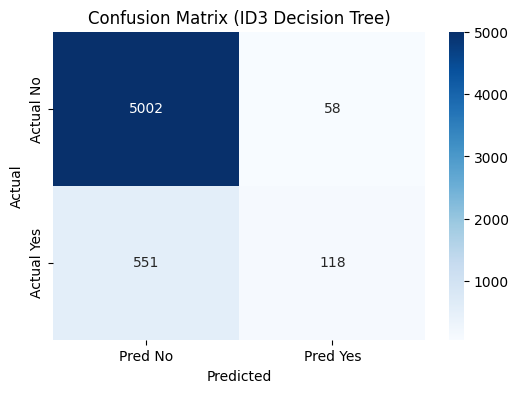

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred No", "Pred Yes"],
            yticklabels=["Actual No", "Actual Yes"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (ID3 Decision Tree)")
plt.show()


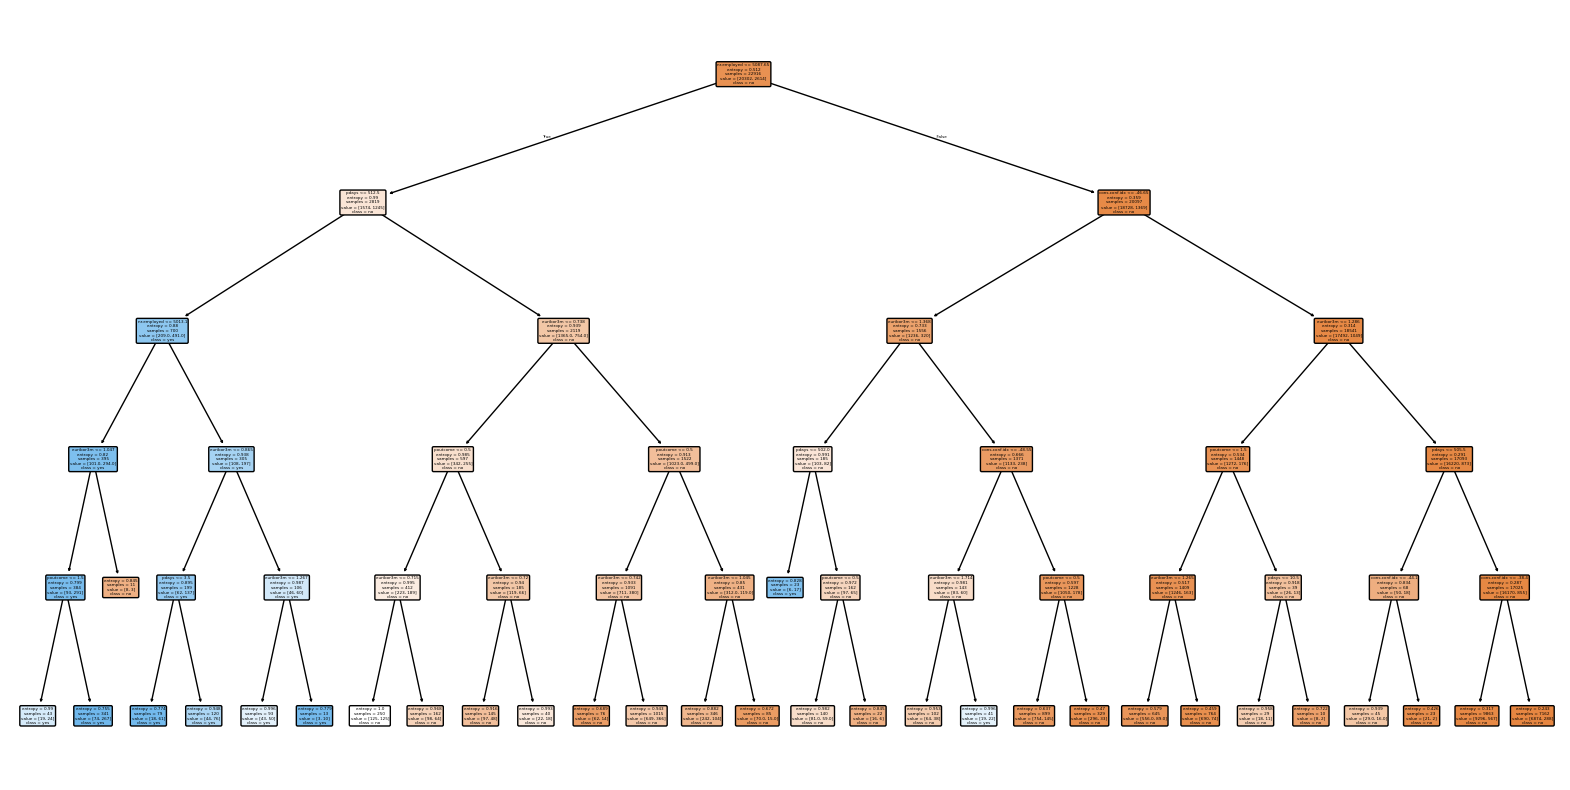

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["no","yes"], filled=True, rounded=True)
plt.show()


In [23]:
#Hyperparameter Tunning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print("Depth | Akurasi (%)")
print("---------------------")

for d in range(2, 15):
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, pred) * 100   # convert to percent
    
    print(f"{d:5d} | {acc:6.2f}%")


Depth | Akurasi (%)
---------------------
    2 |  89.47%
    3 |  89.47%
    4 |  89.46%
    5 |  89.47%
    6 |  89.53%
    7 |  89.60%
    8 |  89.49%
    9 |  89.51%
   10 |  89.51%
   11 |  89.44%
   12 |  89.35%
   13 |  89.33%
   14 |  89.35%


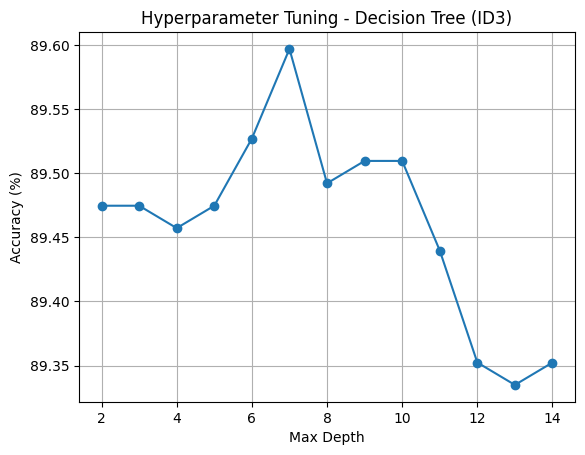

In [24]:
results = []

for d in range(2, 15):
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, pred) * 100

    results.append([d, acc])

df_results = pd.DataFrame(results, columns=["max_depth", "accuracy_percent"])
df_results

plt.plot(df_results["max_depth"], df_results["accuracy_percent"], marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy (%)")
plt.title("Hyperparameter Tuning - Decision Tree (ID3)")
plt.grid(True)
plt.show()

In [25]:
model_final = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model_final.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.8978879385582126
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5060
           1       0.67      0.25      0.36       669

    accuracy                           0.90      5729
   macro avg       0.79      0.62      0.65      5729
weighted avg       0.88      0.90      0.88      5729



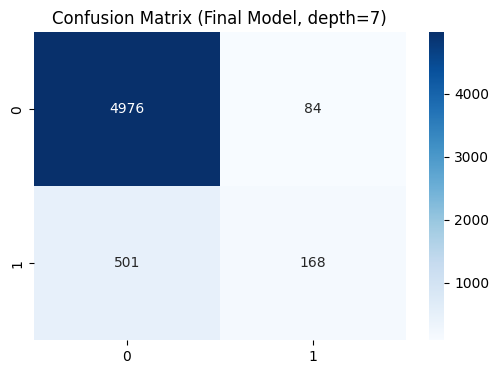

In [26]:
final_pred = model_final.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, final_pred))
print(classification_report(y_valid, final_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, final_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Final Model, depth=7)")
plt.show()

Split for Genetic Algorithm

In [27]:
from sklearn.model_selection import train_test_split

X_tr2, X_ga, y_tr2, y_ga = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
)


Re-train Model for Genetic Algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier


model_ga = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,             
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model_ga.fit(X_tr2, y_tr2)

proba_ga = model_ga.predict_proba(X_ga)[:, 1]        
proba_valid = model_ga.predict_proba(X_valid)[:, 1]


GA Looking for Best Treshold

In [29]:
import random
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

random.seed(42)
np.random.seed(42)

def fitness_threshold(t, y_true, proba):
    y_pred = (proba >= t).astype(int)
    return f1_score(y_true, y_pred, pos_label=1)

# --- GA settings ---
POP_SIZE = 30
N_GEN = 25
ELITE = 4
MUT_RATE = 0.25
CROSS_RATE = 0.7

# init population: threshold antara 0.05 - 0.95
pop = [random.uniform(0.05, 0.95) for _ in range(POP_SIZE)]

best_t = None
best_fit = -1

for gen in range(N_GEN):
    fits = [fitness_threshold(t, y_ga, proba_ga) for t in pop]

    # track best
    gen_best_idx = int(np.argmax(fits))
    if fits[gen_best_idx] > best_fit:
        best_fit = fits[gen_best_idx]
        best_t = pop[gen_best_idx]

    # selection: pilih elite
    elite_idx = np.argsort(fits)[-ELITE:]
    elite = [pop[i] for i in elite_idx]

    # roulette selection helper
    fit_sum = sum(fits) + 1e-9
    probs = [(f / fit_sum) for f in fits]

    def pick_one():
        r = random.random()
        s = 0.0
        for t, p in zip(pop, probs):
            s += p
            if s >= r:
                return t
        return pop[-1]

    # generate new population
    new_pop = elite.copy()

    while len(new_pop) < POP_SIZE:
        p1 = pick_one()
        p2 = pick_one()

        # crossover (blend)
        if random.random() < CROSS_RATE:
            a = random.random()
            c1 = a*p1 + (1-a)*p2
            c2 = a*p2 + (1-a)*p1
        else:
            c1, c2 = p1, p2

        # mutation (small noise)
        def mutate(x):
            if random.random() < MUT_RATE:
                x = x + random.uniform(-0.08, 0.08)
            return float(min(0.95, max(0.05, x)))

        c1 = mutate(c1)
        c2 = mutate(c2)

        new_pop.append(c1)
        if len(new_pop) < POP_SIZE:
            new_pop.append(c2)

    pop = new_pop

print(f"Best threshold from GA (on GA-val): {best_t:.3f} | Best F1(yes): {best_fit:.4f}")


Best threshold from GA (on GA-val): 0.214 | Best F1(yes): 0.5038


In [30]:
# prediksi final pakai threshold terbaik
y_pred_ga = (proba_valid >= best_t).astype(int)

print("=== FINAL EVAL (GA Threshold) ===")
print("Accuracy:", f"{accuracy_score(y_valid, y_pred_ga)*100:.2f}%")
print("Precision(yes):", f"{precision_score(y_valid, y_pred_ga)*100:.2f}%")
print("Recall(yes):", f"{recall_score(y_valid, y_pred_ga)*100:.2f}%")
print("F1(yes):", f"{f1_score(y_valid, y_pred_ga)*100:.2f}%")

cm = confusion_matrix(y_valid, y_pred_ga)
print("Confusion Matrix:\n", cm)


=== FINAL EVAL (GA Threshold) ===
Accuracy: 87.01%
Precision(yes): 45.17%
Recall(yes): 52.47%
F1(yes): 48.55%
Confusion Matrix:
 [[4634  426]
 [ 318  351]]


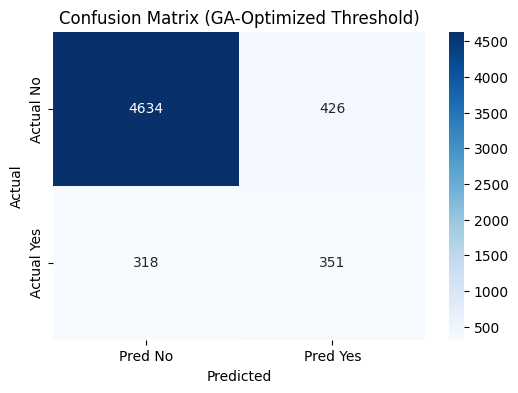

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred No", "Pred Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix (GA-Optimized Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
X_test_final = test_sel[top6]

test_pred = model_final.predict(X_test_final)
test_pred_label = pd.Series(test_pred).map({0: "no", 1: "yes"})

submission = test.copy()
submission["y_pred"] = test_pred_label
submission.to_csv("hasil_prediksi_test.csv", index=False)
submission.head()


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_pred
0,3,21,student,single,unknown,no,no,no,telephone,jul,...,1,12,1,success,-1.7,94.215,-40.3,0.810,4991.6,yes
1,4,42,blue-collar,married,basic.6y,no,no,no,cellular,may,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
2,7,42,technician,married,professional.course,no,yes,no,cellular,aug,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no
3,9,33,services,married,professional.course,unknown,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
4,13,29,unemployed,divorced,high.school,no,no,no,cellular,oct,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.743,5017.5,no


In [37]:
submission["y_pred"].value_counts()

y_pred
no     11976
yes      567
Name: count, dtype: int64

In [38]:
proba_test = model_ga.predict_proba(test_sel[top6])[:, 1]
test_pred_ga = (proba_test >= best_t).astype(int)

submission = test.copy()
submission["y_pred"] = pd.Series(test_pred_ga).map({0:"no", 1:"yes"})
submission.to_csv("hasil_prediksi_test_GA.csv", index=False)
submission.head()


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_pred
0,3,21,student,single,unknown,no,no,no,telephone,jul,...,1,12,1,success,-1.7,94.215,-40.3,0.810,4991.6,yes
1,4,42,blue-collar,married,basic.6y,no,no,no,cellular,may,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
2,7,42,technician,married,professional.course,no,yes,no,cellular,aug,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,yes
3,9,33,services,married,professional.course,unknown,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
4,13,29,unemployed,divorced,high.school,no,no,no,cellular,oct,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.743,5017.5,yes


In [39]:
submission["y_pred"].value_counts()

y_pred
no     10844
yes     1699
Name: count, dtype: int64